In [1]:
## loading and preprocessing data
import numpy as np
import pandas as pd 

## visualization of data
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## splitting our dataset 
from sklearn.model_selection import train_test_split

## loading the learning alg
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#feature engineering
from sklearn.feature_extraction import DictVectorizer

import warnings
warnings.filterwarnings('ignore')
## loading the error metrics
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error,mean_squared_error

In [66]:

## loading dataset

data = pd.read_csv("tel_customer_churn.csv")

## create a copy 

df = data.copy()

In [67]:
## view the first rows 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
df.duplicated().sum()

0

In [69]:
df.shape

(7043, 21)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [72]:
df. columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [73]:
## checking for duplicated values 
df.duplicated().sum()

0

In [74]:
df.customerID.duplicated().sum()

0

In [75]:
## checking type on columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [77]:
## lets return the total counts of unique values in each column 
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [78]:


# Replace invalid entries with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype('float64')

# Verify the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
## checking for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [80]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [81]:

# Option 1: Fill NaN with 0 or another value
# df['TotalCharges'].fillna(0, inplace=True)

# Option 2: Drop rows with NaN
#df.dropna(inplace = True)

# Replace missing values (NaN) in 'TotalCharges' with the column mean
#df['TotalCharges'].fillna(df['TotalCharges'].median().round(2), inplace=True)

# Replace missing values (NaN) in 'TotalCharges' with the column mean
df['TotalCharges'].fillna(df['TotalCharges'].mean().round(2), inplace=True)

# Verify the result
print(df['TotalCharges'].isna().sum())  # Should print 0 if all NaN values are replaced


0


In [82]:
df.describe().round()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0,7043.0
mean,0.0,32.0,65.0,2283.0
std,0.0,25.0,30.0,2265.0
min,0.0,0.0,18.0,19.0
25%,0.0,9.0,36.0,402.0
50%,0.0,29.0,70.0,1401.0
75%,0.0,55.0,90.0,3787.0
max,1.0,72.0,119.0,8685.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
#df_train_full, df_test = train_test_split(df, test_size=0.15, random_state=11)
#print(df.shape)
#print(df_train_full.shape)


In [85]:
#df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11) 

#print(f'Train set {len(df_train)}')
#print(f'Valid set {len(df_valid)}')
#print(f'Test set {len(df_test)}')


In [86]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300440
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [87]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
gen = ['Female', 'Male']
filt_gender = df.loc[df['gender'].isin(gen), ['gender']]

In [89]:
gender_counts = filt_gender['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']


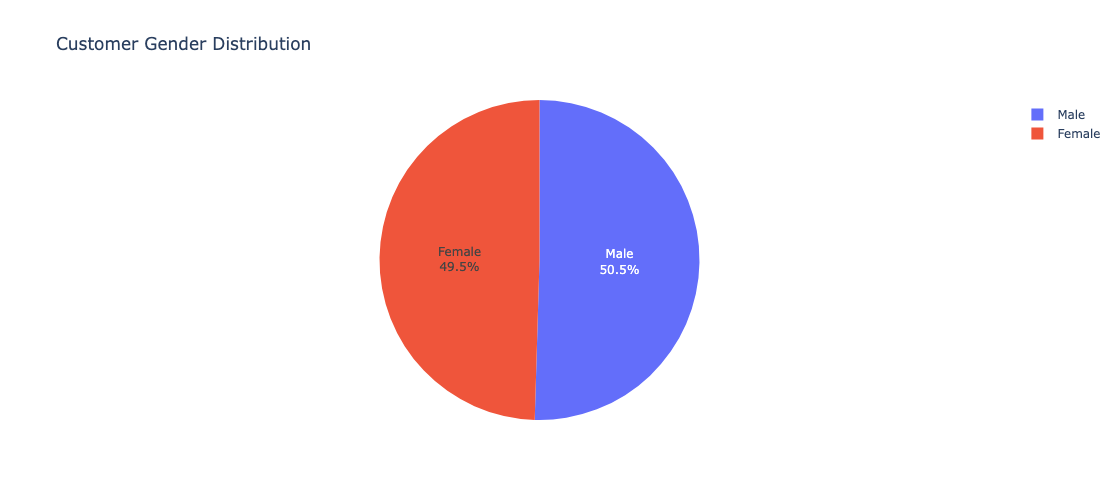

In [90]:

fig = px.pie(
    gender_counts,
    names='gender',
    values='count',
    color='gender',
    title='Customer Gender Distribution'
)
fig.update_layout(showlegend=True, yaxis_tickformat=',.2f', height = 500)
fig.update_traces(textinfo='percent+label')  
fig.show()



In [91]:
df.shape

(7043, 21)

Text(0.5, 1.0, 'Percentage of Senior Citizens')

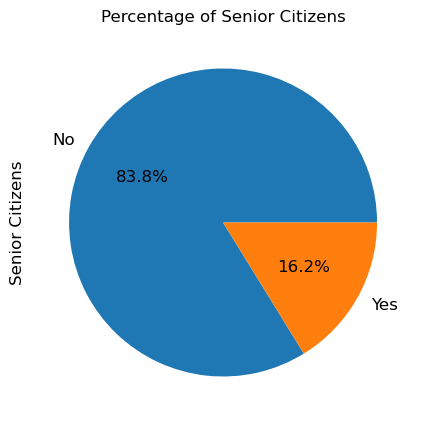

In [92]:
# Calculate percentage of Senior Citizens
percentages = (df['SeniorCitizen'].value_counts() * 100.0 / len(df))

# Plot pie chart
axis = percentages.plot.pie( autopct='%.1f%%',labels=['No', 'Yes'],figsize=(5, 5),  fontsize=12  )

axis.set_ylabel('Senior Citizens', fontsize=12)  
axis.set_title('Percentage of Senior Citizens', fontsize=12)  


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300440,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [94]:
df.duplicated().sum()

0

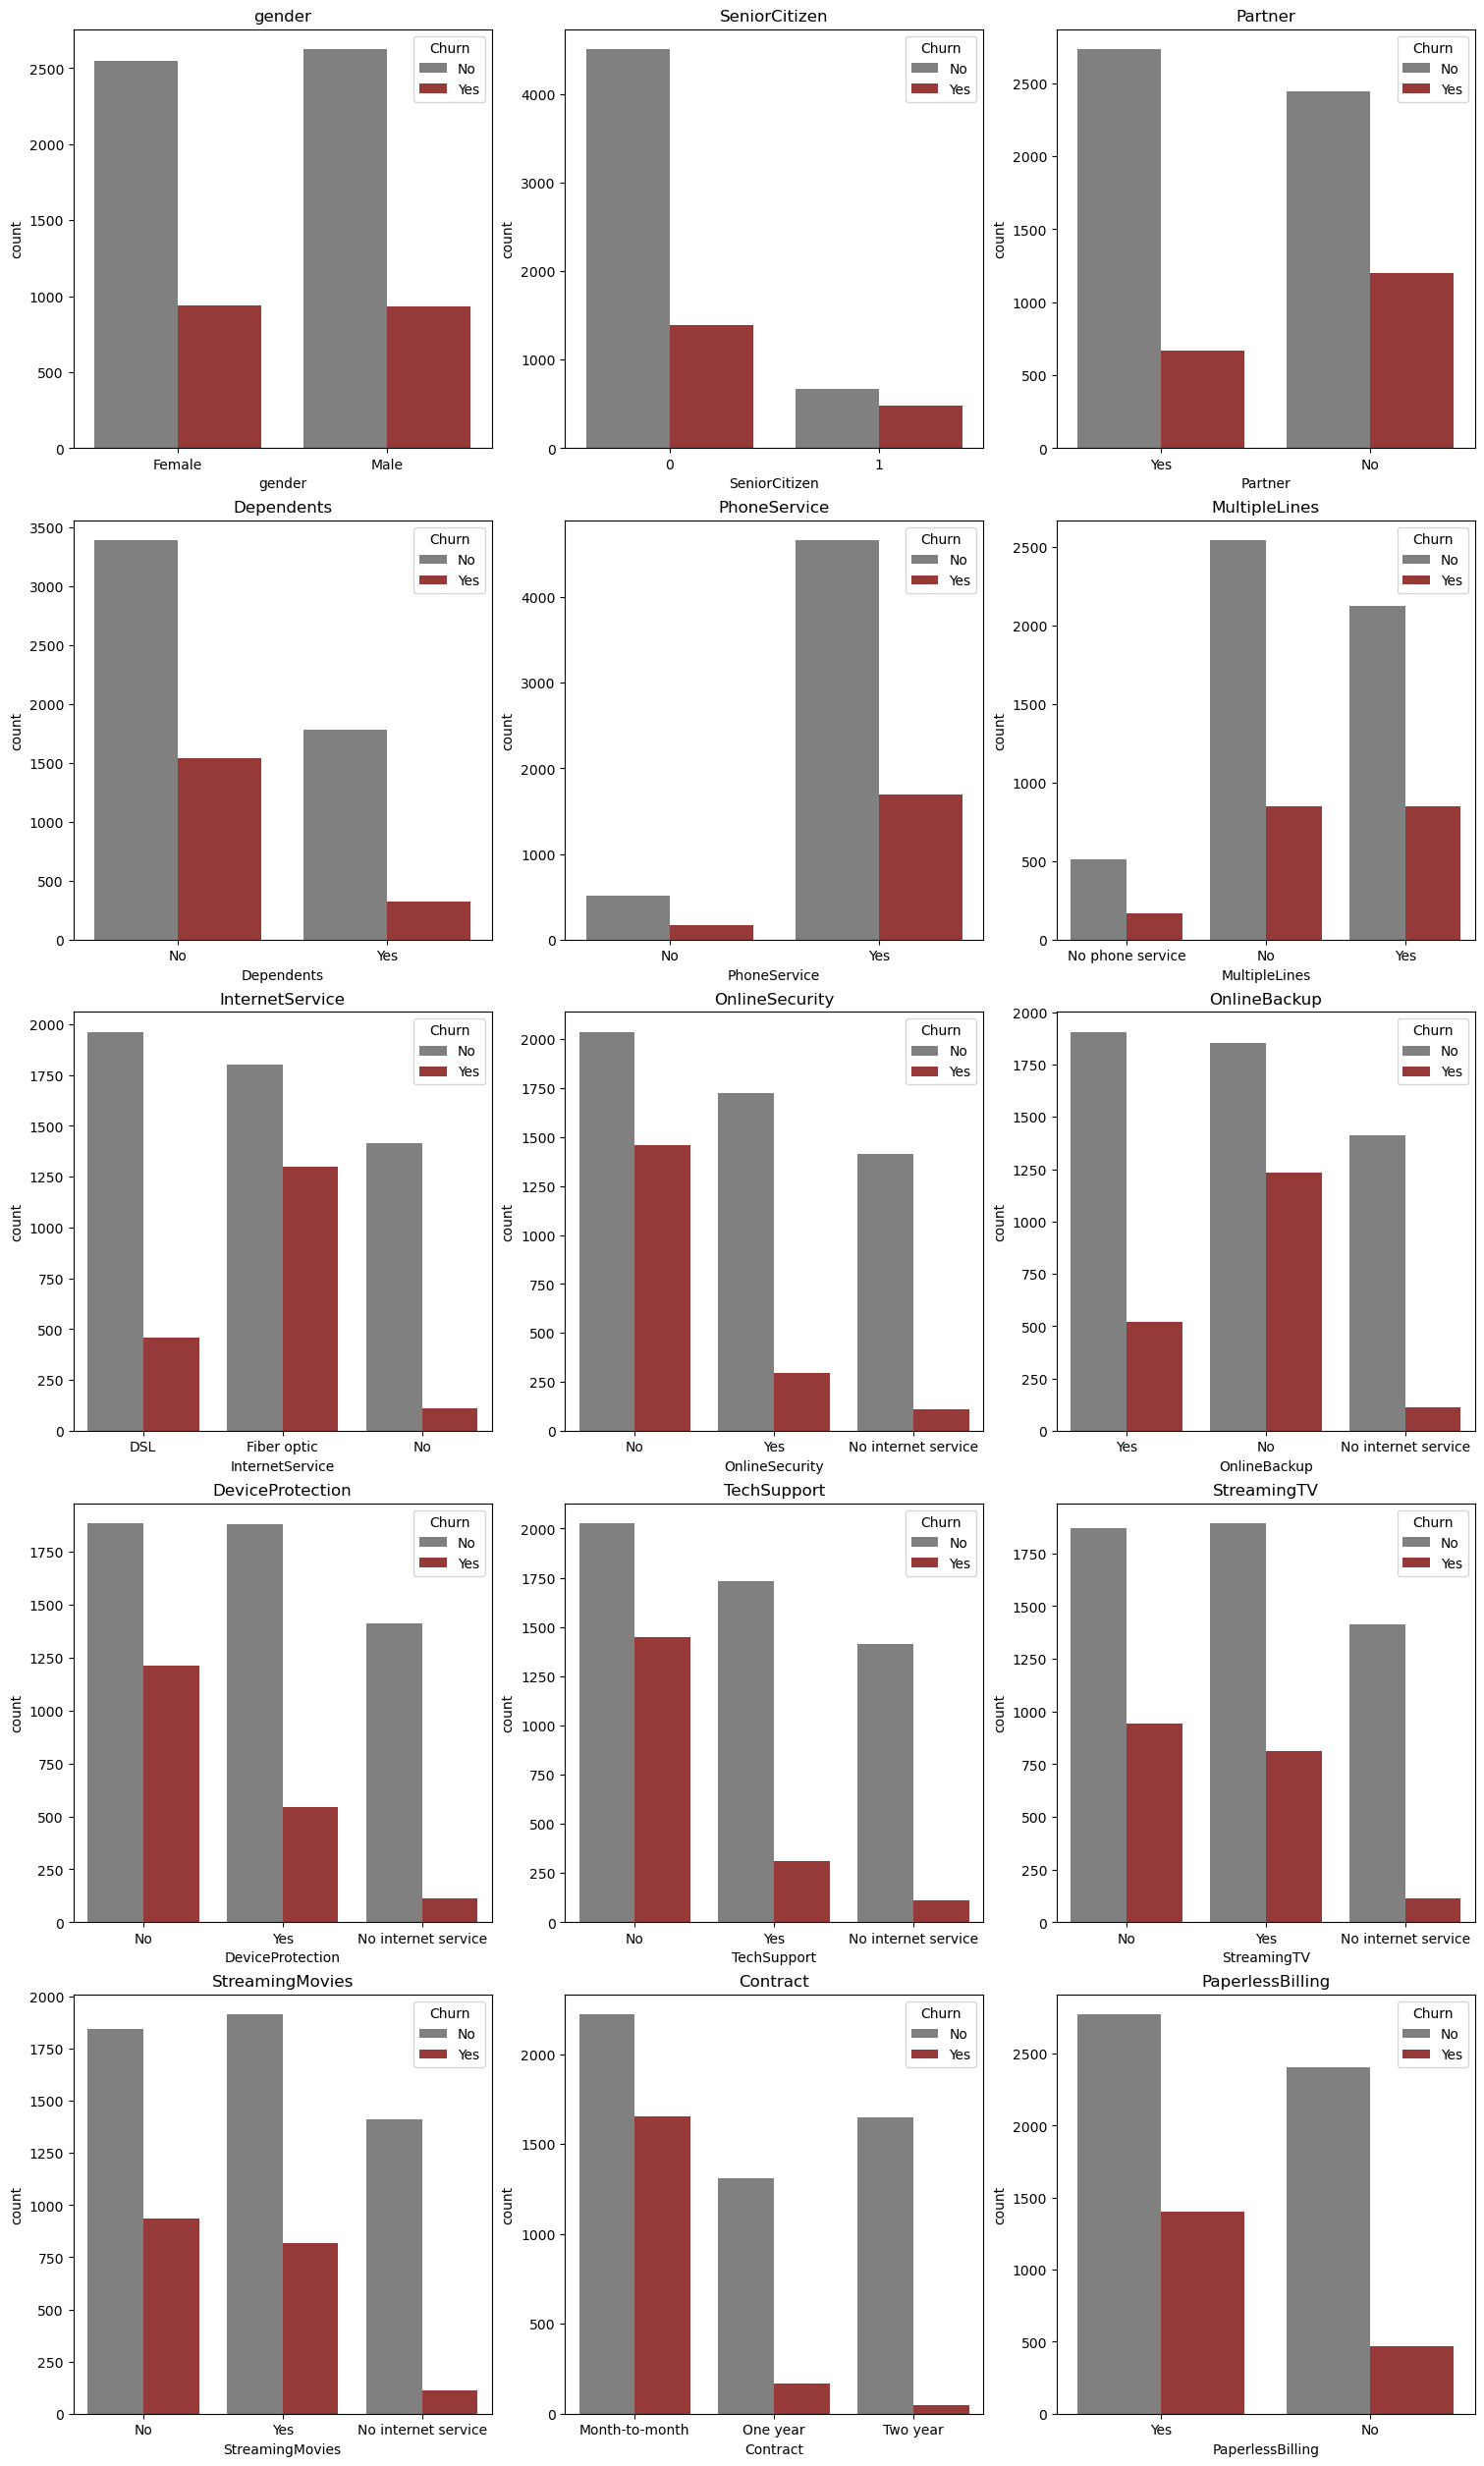

In [135]:

# Define colors for Yes and No
colors = {'Yes': 'brown', 'No': 'grey'}

# Select predictors
col_to_predict = df.drop(columns=['customerID','Churn', 'TotalCharges', 'MonthlyCharges', 'tenure','PaymentMethod']).columns

# Create subplots
n_predictors = len(col_to_predict)
rows = (n_predictors + 2) // 3 
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows), constrained_layout=True)

# Flatten axes to iterate
axes = axes.flatten()

# Plot each predictor
for i, col_to_predict in enumerate(col_to_predict):
    sns.countplot(data=df, x=col_to_predict, hue='Churn', palette=colors, ax=axes[i])
    axes[i].set_title(col_to_predict)

# Hide any unused subplots
for a in range(i + 1, len(axes)):
    axes[a].set_visible(False)

plt.show()
